In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import sounddevice as sd
import scipy
import pickle
import librosa
%matplotlib qt5

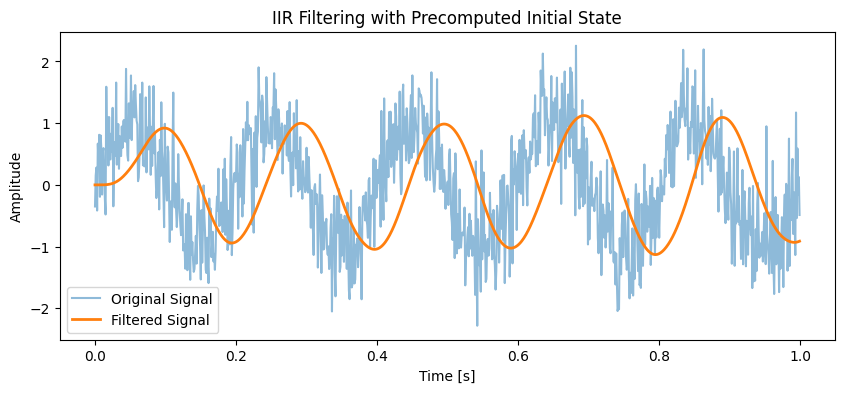

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Generate a test signal: sine wave + noise
fs = 1000  # Sampling rate (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
signal_input = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))

# Design a low-pass IIR filter (Butterworth)
order = 4
cutoff = 10  # Cutoff frequency in Hz
b, a = signal.butter(order, cutoff / (fs / 2), btype='low')

# Assume we have precomputed output `y_prev` for an initial segment
y_prev = signal.lfilter(b, a, signal_input[:10])  # Precomputed first 10 samples

# Get the initial conditions from the precomputed output `y_prev`
zi = signal.lfiltic(b, a, y_prev[::-1], signal_input[:10][::-1])


# Apply the filter using lfilter with the computed initial conditions
filtered_signal, zf = signal.lfilter(b, a, signal_input[10:], zi=zi)

# Reconstruct the full filtered signal by concatenating the precomputed part with the filtered part
filtered_signal = np.concatenate((y_prev, filtered_signal))

# Plot the original and filtered signals
plt.figure(figsize=(10, 4))
plt.plot(t, signal_input, label="Original Signal", alpha=0.5)
plt.plot(t, filtered_signal, label="Filtered Signal", linewidth=2)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("IIR Filtering with Precomputed Initial State")
plt.show()
